### Dados Netflix


In [1]:
import pandas as pd

In [2]:
df_netflix = pd.read_csv('dados/netflix.csv')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
df_netflix.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

*1. Quantos usuários utilizam a Netflix pelo Tablet?*

In [4]:
df_netflix['Device'].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

633 usuários utilizam a Netflix pelo tablet.

*2. Qual é a representatividade (em %) do sistema operacional (device) mais utilizado para assistir Netflix?*

In [5]:
df_netflix['Device'].value_counts(normalize=True)

Device
Laptop        0.2544
Tablet        0.2532
Smartphone    0.2484
Smart TV      0.2440
Name: proportion, dtype: float64

O laptop é device mais utilizado para assistir Netflix representando 25,44% do total dos devices em que os usuários assistem.

*3. Visualizações para as seguintes perguntas:*

*3.1. Qual é o sistema operacional (device) mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?*

In [6]:
df_netflix.loc[df_netflix['Age'] < 25, 'grupo_idade'] = '20-24'
df_netflix.loc[(df_netflix['Age'] >= 25) & (df_netflix['Age'] < 30), 'grupo_idade'] = '25-29'
df_netflix.loc[(df_netflix['Age'] >= 30) & (df_netflix['Age'] < 35), 'grupo_idade'] = '30-34'
df_netflix.loc[(df_netflix['Age'] >= 35) & (df_netflix['Age'] < 40), 'grupo_idade'] = '35-39'
df_netflix.loc[(df_netflix['Age'] >= 40) & (df_netflix['Age'] < 45), 'grupo_idade'] = '40-44'
df_netflix.loc[(df_netflix['Age'] >= 45) & (df_netflix['Age'] < 50), 'grupo_idade'] = '45-49'
df_netflix.loc[(df_netflix['Age'] >= 50) & (df_netflix['Age'] < 55), 'grupo_idade'] = '50-54'
df_netflix.loc[(df_netflix['Age'] >= 55) & (df_netflix['Age'] < 60), 'grupo_idade'] = '55-59'
df_netflix.loc[df_netflix['Age'] >= 60, 'grupo_idade'] = '60+'
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,grupo_idade
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,25-29
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,35-39
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,40-44
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,50-54
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,30-34
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,25-29
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,30-34
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,35-39
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,45-49


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

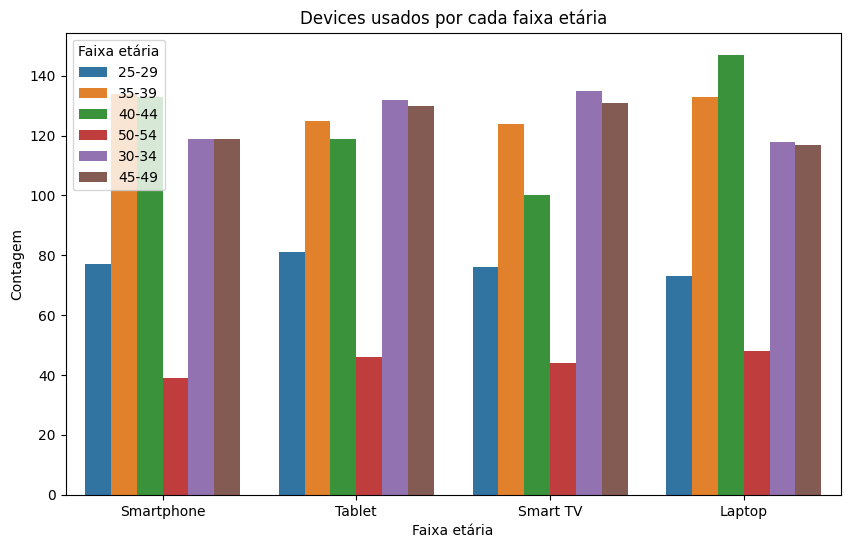

In [8]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df_netflix,
              x = 'Device',
              hue = 'grupo_idade')


plt.title('Devices usados por cada faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

plt.legend(title = 'Faixa etária')

plt.show()

Foi observado que as pessoas utilizam quatro tipos de devices para assistir a Netflix sendo eles smartphone, tablet, smart TV e laptop. 
Os smartphones foram mais utilizados na faixa etária entre 35 - 44 anos.
Os tablets e as smart TVs foram mais utilizados na faixa etária entre 30 - 34 anos e 45 - 49 anos.
Os laptops foram mais utilizados na faixa etária entre 40 - 44 anos.

O grupo na faixa etária entre 25 - 29 anos e 50 - 54 assistem a Netflix nos 4 devices em percentuais parecidos o que mostra que eles não possuem preferência de tela. O destaque fica na faixas etárias de 30 - 34 anos e 45 - 49 anos que possuem essa preferência de tela senda elas o tablet e a smart TV.

*3.2. No Brasil, qual é o sistema operacional mais utilizado?*

In [9]:
df_netflix_br = df_netflix[df_netflix['Country'].isin(['Brazil'])]

df_netflix_br

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,grupo_idade
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month,45-49
16,17,Basic,10,24-01-22,25-06-23,Brazil,30,Female,Laptop,1 Month,30-34
26,27,Basic,10,29-08-22,25-06-23,Brazil,47,Female,Smart TV,1 Month,45-49
36,37,Basic,10,14-09-22,25-06-23,Brazil,45,Female,Laptop,1 Month,45-49
46,47,Basic,10,05-10-22,25-06-23,Brazil,39,Female,Smart TV,1 Month,35-39
...,...,...,...,...,...,...,...,...,...,...,...
2431,2432,Basic,11,19-08-22,14-07-23,Brazil,28,Female,Tablet,1 Month,25-29
2446,2447,Basic,14,21-10-22,12-07-23,Brazil,27,Male,Tablet,1 Month,25-29
2461,2462,Basic,11,13-11-22,13-07-23,Brazil,40,Female,Smart TV,1 Month,40-44
2476,2477,Premium,12,30-08-22,12-07-23,Brazil,40,Male,Laptop,1 Month,40-44


In [16]:
df_netflix_br['Device'].value_counts()

Device
Smartphone    55
Tablet        44
Laptop        44
Smart TV      40
Name: count, dtype: int64

In [17]:
df_netflix_br['Device'].value_counts(normalize=True)

Device
Smartphone    0.300546
Tablet        0.240437
Laptop        0.240437
Smart TV      0.218579
Name: proportion, dtype: float64

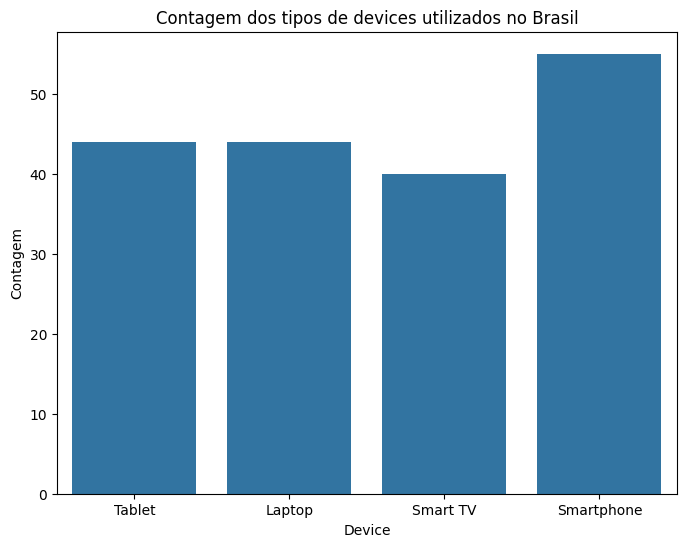

In [18]:
plt.figure(figsize=(8, 6))

sns.countplot(data = df_netflix_br, x = 'Device')

plt.title('Contagem dos tipos de devices utilizados no Brasil')
plt.xlabel('Device')
plt.ylabel('Contagem')

plt.show()

O device mais utilizados pelos brasileiros para assistir a Netflix é o smarthphone com 30.05% dentre os sistemas operacionais.